In [1]:
import os
import torch
from deeplsd.models.deeplsd_inference import DeepLSD
from line_understanding.pipeline import process_image_pipeline, plot_pipeline_results
from line_understanding.json_saver import save_lines_to_json 


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
conf = {'detect_lines': True, 'line_detection_params': {'merge': False, 'filtering': True, 'grad_thresh': 3}}
ckpt = torch.load('../weights/deeplsd_md.tar', map_location='cpu', weights_only=False)
net = DeepLSD(conf)
net.load_state_dict(ckpt['model'])
net = net.to(device).eval()



In [3]:
frame_str = "0001"
desired_images = [
    "ai_001_001",
    "ai_001_004",
]



data/ai_001_001/ai_001_001/images/scene_cam_00_final_preview/frame.0001.color.jpg
data/ai_001_001/ai_001_001/images/scene_cam_00_geometry_hdf5/frame.0001.normal_world.hdf5
data/ai_001_001/ai_001_001/images/scene_cam_00_geometry_hdf5/frame.0001.depth_meters.hdf5
data/ai_001_001/ai_001_001/images/scene_cam_00_geometry_hdf5/frame.0001.position.hdf5
[Neighborhood Method] ai_001_001: Detected 398 lines; 80 structural.


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


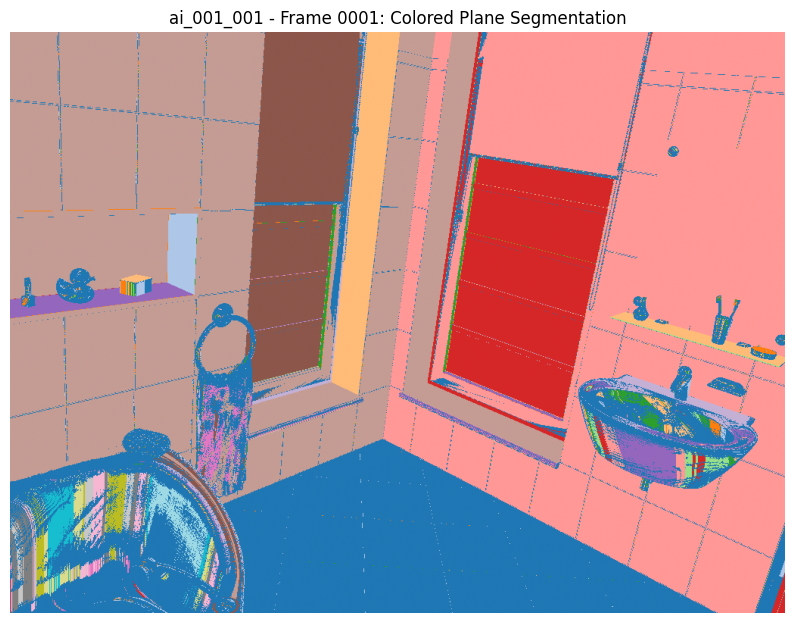

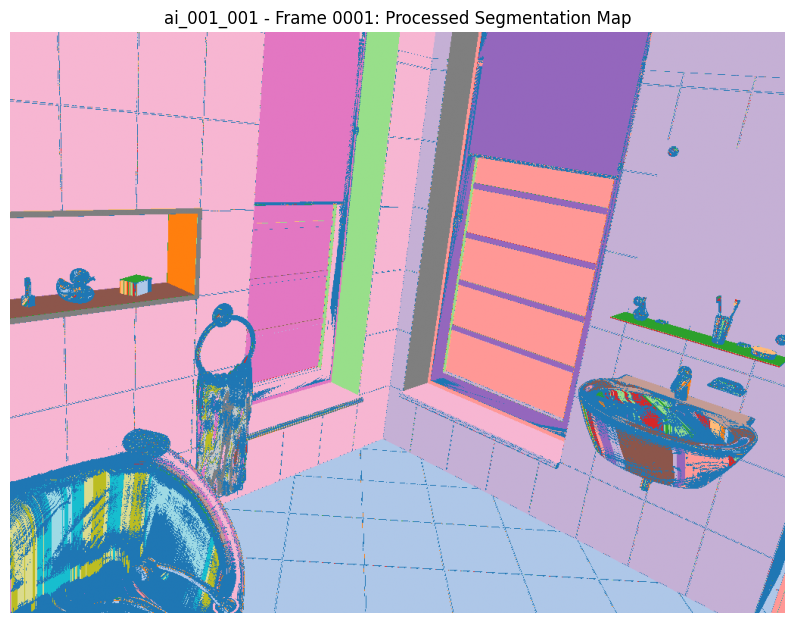

Unique Labels: [-1, 263, 728, 1003, 1004, 2284, 3793, 4383, 4847, 4876, 6585, 6619, 6751, 6960, 6961, 6962, 6963, 7477, 7480, 8090, 8101, 8106, 8314, 8621, 10254, 10355, 10369, 10370, 10371, 10372, 11502, 11635, 11715, 11716, 11764, 11853, 11854, 11855, 11856, 11964, 12465]
Number of Clusters: 41


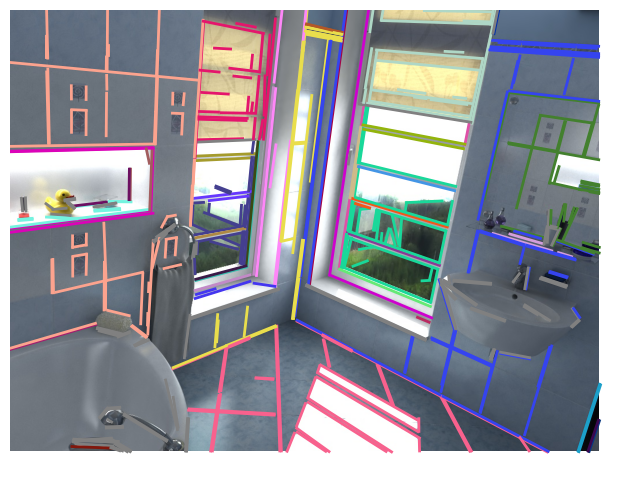

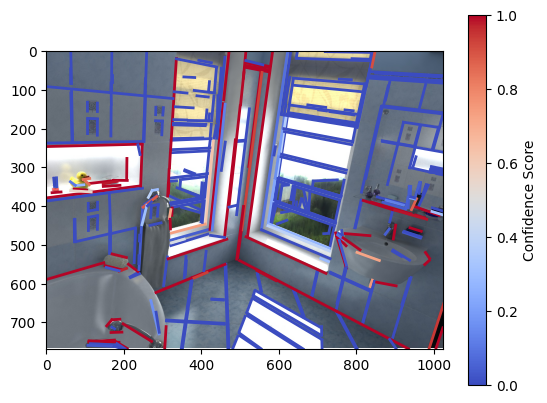

data/ai_001_004/ai_001_004/images/scene_cam_00_final_preview/frame.0001.color.jpg
data/ai_001_004/ai_001_004/images/scene_cam_00_geometry_hdf5/frame.0001.normal_world.hdf5
data/ai_001_004/ai_001_004/images/scene_cam_00_geometry_hdf5/frame.0001.depth_meters.hdf5
data/ai_001_004/ai_001_004/images/scene_cam_00_geometry_hdf5/frame.0001.position.hdf5
[Neighborhood Method] ai_001_004: Detected 376 lines; 89 structural.


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


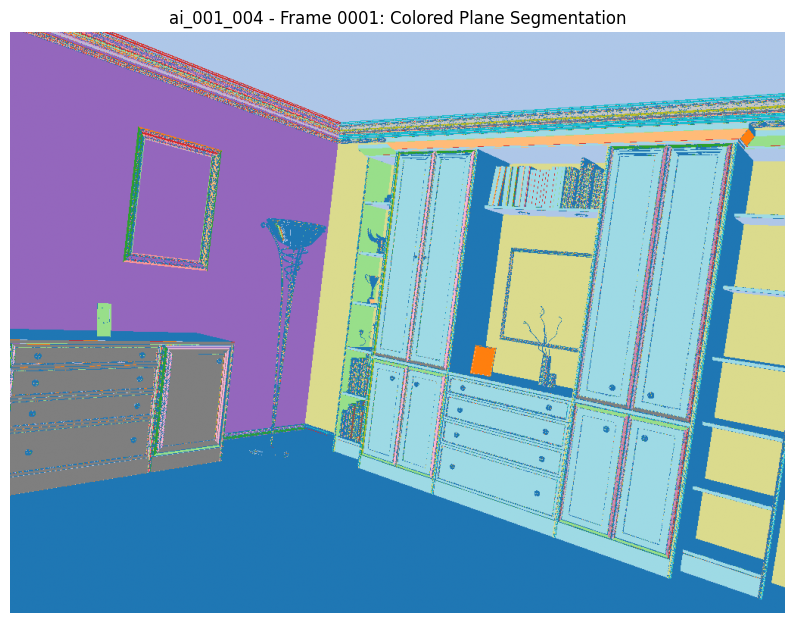

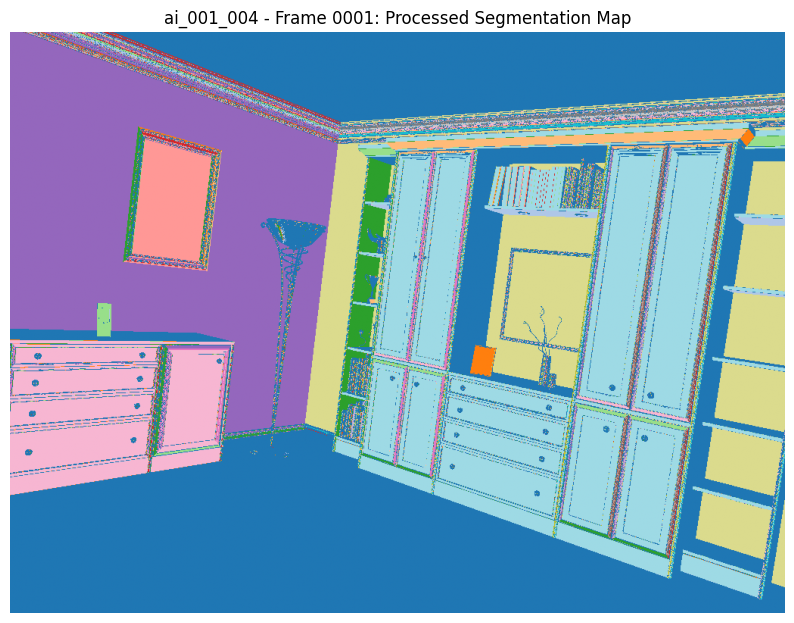

Unique Labels: [-1, 32, 216, 331, 335, 336, 337, 375, 724, 774, 1007, 1174, 1217, 1631, 2011, 2614, 2732, 2733, 2734, 4688, 9983, 10237, 10420, 10431, 10839, 13176, 16456, 16746, 16961, 17503, 17871, 18075, 18358, 27368, 35492, 35493, 35494, 35496, 35498, 35499, 35500, 35501, 35649, 37265, 37395, 37427, 40141, 40431, 40432, 40433, 40434, 40435, 40436, 40437, 40438, 40439, 40440, 40442, 40443, 40444, 40446, 40447, 40454, 40557, 40558, 41418, 41419]
Number of Clusters: 67


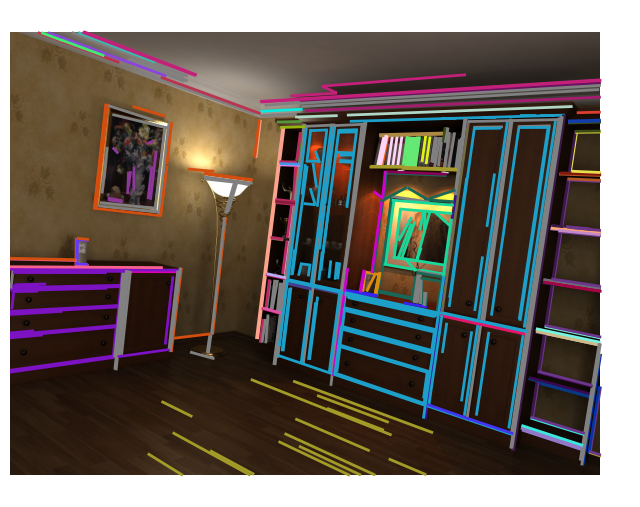

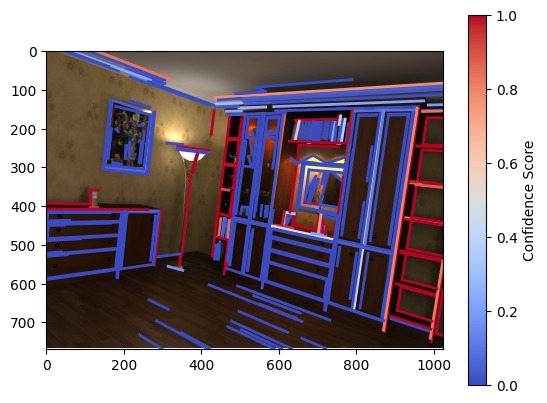

In [4]:
# Process, plot, and save JSON data for each image.
for image_id in desired_images:
    processed_data = process_image_pipeline(image_id, frame_str, net, device)
    if processed_data is not None:
        plot_pipeline_results(processed_data, frame_str)
        save_lines_to_json(image_id, processed_data["line_info"],processed_data["coplanarity_matrix"])